<a href="https://colab.research.google.com/github/p3dm/MachineLearning-Project-II/blob/main/Spam_email_by_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>

  <strong>How to get started?</strong>
    <ol>
      <li><msg desc="First bullet point of a list explaining how to get started with the Gemini API, this one tells to visit AI studio and log-in with a Google account.">Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</msg></li>
      <li><msg desc="Second bullet point of a list explaining how to get started with the Gemini API, this one tells to create an API key on https://aistudio.google.com/app/apikey."><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</msg></li>
      <li><msg desc="Third and last bullet point of a list explaining how to get started with the Gemini API, this one tells to open a python or rest quickstart to start playing with the Gemini API.">Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</msg></li>
      </ol>

  <strong>Discover Gemini's advanced capabilities</strong>
    <ul>
      <li><msg desc="Link to the Live API quickstart and its live demo on AI Studio.">Discover the <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb">multimodal Live API</a> (demo <a href="https://aistudio.google.com/live">here</a>).</msg></li>
      <li><msg desc="Link to the Spatial understanding quickstart and its 3d version.">Learn how to <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb">analyze images and detect items in your pictures</a> using Gemini (bonus, there's a <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb">3D version</a> as well!).</msg></li>
      <li><msg desc="Link to the Thinking model quickstart.">Unlock the power of <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb">Gemini thinking model</a>, capable of solving complex task with its inner thoughts.</msg></li>
    </ul>
      
  <strong>Explore complex use cases</strong>
    <ul>
      <li><msg desc="Link to the search grounding example, using Gemini and google search to gather info on companies.">Use <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb">Gemini grounding capabilities</a> to create a report on a company based on what the model can find on internet.</msg></li>
      <li><msg desc="Link to the PDF parsing example, using Gemini multimodal and structured output capabilities to parse invoices and forms.">Extract <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb">invoices and form data from PDF</a> in a structured way.</msg></li>
      <li><msg desc="Link to the Book illustration example, using Gemini and Imagen to generate illustions for an open-source book.">Create <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb">illustration based on a whole book</a> using Gemini large context window and Imagen.</msg></li>
    </ul>
  <p><msg desc="Link to the cookbook and the Gemini API documentation so that users can learn more about the API.">To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.</msg>
  </p>
</div>


<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

# K_NN


k_Neareast Neighbour algorithm

In [4]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def euclidean_distance(point1, point2) :
  return np.sqrt(np.sum((np.array(point1)- np.array(point2))**2))
def euclidean_distance1(point1, point2) :
  diff = 0
  for i in range(len(point1)):
    diff += (point1[i] - point2[i])**2
  return diff**0.5

def manhattan_distance(point1, point2):
  diff = 0
  for i in range(len(point1)):
    diff += abs(point1[i]-point2[i])
  return diff

def knn_predict(training_data, training_label, test_point, k):
  distances=[]
  for i in range(len(training_data)):
    dist = manhattan_distance(test_point, training_data[i])
    distances.append((dist, training_label[i]))
  distances.sort(key = lambda x: x[0])

  weighted_votes = {}
  for dist, label in distances[:k]:
    weight = 1 / (dist + 1e-9)
    weighted_votes[label] = weighted_votes.get(label,0) + weight
  return max(weighted_votes, key=weighted_votes.get)




Decision tree


# Decision tree


In [63]:
from graphviz import Digraph
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value


def gini_impurity(y):
    class_counts = {}
    for label in y:
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1
    total_samples = len(y)
    probabilities = [count / total_samples for count in class_counts.values()]
    return 1 - sum(p * p for p in probabilities)


def find_best_split(X, y):
    best_feature, best_threshold = None, None
    best_gini = float('inf')
    n_features = len(X[0]) if X else 0

    for feature in range(n_features):
        thresholds = sorted(set(row[feature] for row in X))
        for threshold in thresholds:
            left_X, left_y = [], []
            right_X, right_y = [], []
            for i in range(len(X)):
                if X[i][feature] <= threshold:
                    left_X.append(X[i])
                    left_y.append(y[i])
                else:
                    right_X.append(X[i])
                    right_y.append(y[i])
            if not left_y or not right_y:
                continue
            gini_left = gini_impurity(left_y)
            gini_right = gini_impurity(right_y)
            weighted_gini = (len(left_y) * gini_left + len(right_y) * gini_right) / len(y)
            if weighted_gini < best_gini:
                best_gini = weighted_gini
                best_feature = feature
                best_threshold = threshold
    return best_feature, best_threshold


class DecisionTreeClassifier1:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y, depth=0):
        if (self.max_depth is not None and depth >= self.max_depth) or \
           len(y) < self.min_samples_split or \
           len(set(y)) == 1:
            most_common_class = max(set(y), key=y.count)
            return Node(value=most_common_class)

        feature, threshold = find_best_split(X, y)
        if feature is None:
            most_common_class = max(set(y), key=y.count)
            return Node(value=most_common_class)

        left_X, left_y = [], []
        right_X, right_y = [], []
        for i in range(len(X)):
            if X[i][feature] <= threshold:
                left_X.append(X[i])
                left_y.append(y[i])
            else:
                right_X.append(X[i])
                right_y.append(y[i])

        left_node = self.fit(left_X, left_y, depth + 1)
        right_node = self.fit(right_X, right_y, depth + 1)
        return Node(feature=feature, threshold=threshold, left=left_node, right=right_node)

    def train(self, X, y):
         self.root = self.fit(X, y)

    def predict_single(self, x, node, path=None):
        if path is None:
            path = []
        path.append(node)
        if node.value is not None:
            return node.value, path
        if x[node.feature] <= node.threshold:
            return self.predict_single(x, node.left, path)
        else:
            return self.predict_single(x, node.right, path)

    def predict(self, X):
        return [self.predict_single(x, self.root)[0] for x in X]

    def plot_tree(self, feature_names=None, class_names=None):
        dot = Digraph(comment='Decision Tree')

        def add_nodes_edges(node, dot, node_id=0):
            node_name = f'node{node_id}'
            if node.value is not None:
                label = f'Class: {class_names[node.value] if class_names else node.value}'
                dot.node(node_name, label, shape='box', style='filled', fillcolor='lightgreen')
            else:
                feature = feature_names[node.feature] if feature_names else f'Feature {node.feature}'
                label = f'{feature} <= {node.threshold:.2f}'
                dot.node(node_name, label, shape='ellipse', style='filled', fillcolor='lightblue')

            next_id = node_id + 1
            if node.left:
                left_id = next_id
                dot.edge(node_name, f'node{left_id}', label='True')
                next_id = add_nodes_edges(node.left, dot, left_id)
            if node.right:
                right_id = next_id
                dot.edge(node_name, f'node{right_id}', label='False')
                next_id = add_nodes_edges(node.right, dot, right_id)
            return next_id

        add_nodes_edges(self.root, dot)
        return dot

# Naive Bayes

Gaussian Naive Bayes

In [60]:
import math
from collections import Counter
class NaiveBayesClassifier:
    def __init__(self):
        self.class_priors = {}
        self.feature_likelihoods = {}
    def fit(self, X, y):
        self.class_priors = Counter(y)
        self.feature_likelihoods = {}
        for feature_index in range(len(X[0])):
            self.feature_likelihoods[feature_index] = {}
            for class_label in self.class_priors:
                class_samples = [X[i][feature_index] for i in range(len(X)) if y[i] == class_label]
                mean = sum(class_samples) / len(class_samples)
                variance = sum((x - mean) ** 2 for x in class_samples) / len(class_samples) + 1e-9  
                self.feature_likelihoods[feature_index][class_label] = (mean, variance)
    def predict(self, X):
        predictions = []
        for x in X:
            class_scores = {}
            for class_label, prior in self.class_priors.items():
                score = math.log(prior / len(self.class_priors.values()))
                for feature_index in range(len(x)):
                    mean, variance = self.feature_likelihoods[feature_index][class_label]
                    score += -0.5 * math.log(2 * math.pi * variance) - ((x[feature_index] - mean) ** 2) / (2 * variance)
                class_scores[class_label] = score
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        return predictions
                


In [61]:
import math
from collections import Counter, defaultdict

class MultinomialNaiveBayesClassifier:
    def __init__(self):
        self.class_priors = {}
        self.feature_likelihoods = {}
        self.n_features = 0
        self.classes = []
    def fit(self, X, y):
        self.classes = list(set(y))
        self.n_features = len(X[0])
        class_counts = Counter(y)
        total_count = len(y)
        self.class_priors = {cls: class_counts[cls] / total_count for cls in self.classes}
        self.feature_likelihoods = {cls: [0] * self.n_features for cls in self.classes}
        feature_counts = {cls: [0] * self.n_features for cls in self.classes}
        class_feature_sum = {cls: 0 for cls in self.classes}
        for xi, label in zip(X, y):
            for j in range(self.n_features):
                feature_counts[label][j] += xi[j]
                class_feature_sum[label] += xi[j]
        for cls in self.classes:
            self.feature_likelihoods[cls] = [
                (feature_counts[cls][j] + 1) / (class_feature_sum[cls] + self.n_features)
                for j in range(self.n_features)]
    def predict(self, X):
        predictions = []
        for x in X:
            class_scores = {}
            for cls in self.classes:  
                score = math.log(self.class_priors[cls])
                for j in range(self.n_features):
                    prob = self.feature_likelihoods[cls][j]
                    score += x[j] * math.log(prob)
                class_scores[cls] = score
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        return predictions
                

# Spam email

In [16]:
import pandas as pd
df = pd.read_csv("D:\hoctap\MachineLearning-Project-II\dataset\spam.csv", encoding='latin-1')

df = df.drop(columns = {'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'})

df = df.rename(columns = {"v1":"Type", "v2":"Text"})

df['Length'] = df['Text'].apply(len)

df.head()


,Type,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
df.loc[:, 'Type'] = df.Type.map({ 'spam' : 1, 'ham' : 0})

df['Type'] = df['Type'].astype(int)
df.head()

,Type,Text,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')

english_stopwords = set(stopwords.words('english'))
text = df["Text"].tolist()

def process_text(text):
  cleaned_corpus = []
  for sent in text:
    words = re.findall(r'\b[a-zA-Z]{2,}\b', sent.lower())
    cleaned_corpus.append(' '.join([word for word in words if word not in english_stopwords]))
  return cleaned_corpus



X = process_text(text)
y = df.Type


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


vec = CountVectorizer()

X_train = vec.fit_transform(X_train)

test_point = ["Congratulations!! You 've won a free gift"]
test_point = process_text(test_point)
test_point = vec.transform(test_point)

X_test = vec.transform(X_test)

test_point = [list(x) for x in test_point.toarray()]
X_train = [list(x) for x in X_train.toarray()]
X_test = [list(x) for x in X_test.toarray()]
y_train = y_train.tolist()
y_test = y_test.tolist()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree = DecisionTreeClassifier1(max_depth = 20, min_samples_split= 2 )
tree.train(X_train, y_train)
y_pred = tree.predict(X_test)

# y_pred = tree.predict(test_point)

# if y_pred == 1:
#   print("Spam")
# else:
#   print("Not spam")

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9659192825112107


In [ ]:
from sklearn.metrics import accuracy_score
k = 10
knn_pred = []
for i in range(len(X_test)):
  prediction = knn_predict(X_train, y_train, X_test[i], k)
  knn_pred.append(prediction)

score2 = accuracy_score(y_test, knn_pred)
score2

In [14]:
naive = NaiveBayesClassifier()
naive.fit(X_train, y_train)
naive_pred = naive.predict(X_test)
naive_accuracy = accuracy_score(y_test, naive_pred)
print(f"Naive Bayes Accuracy: {naive_accuracy}")


Naive Bayes Accuracy: 0.65


# Letter_recognition

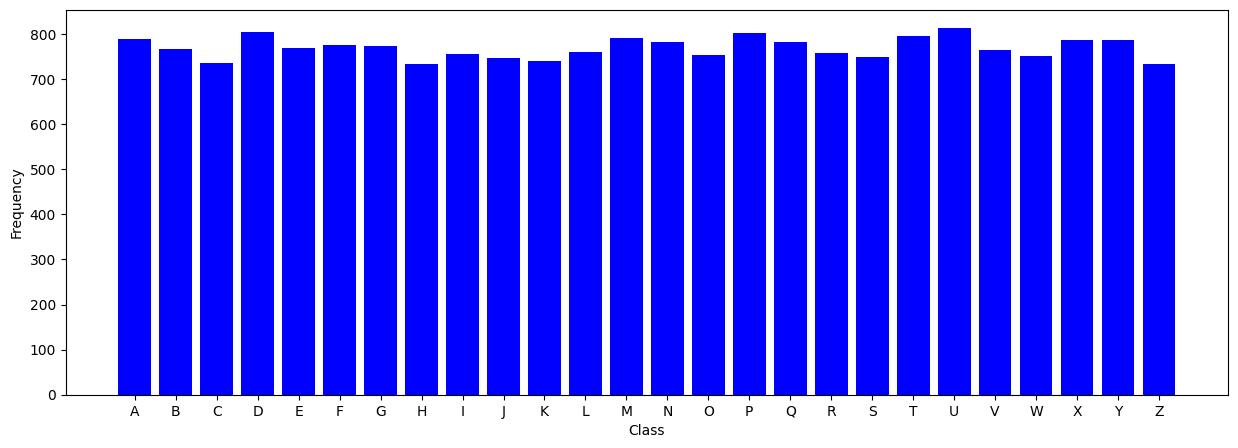

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score


df = pd.read_csv("D:\hoctap\MachineLearning-Project-II\dataset\letter-recognition.csv")


scaler = MinMaxScaler()

y = df.letter
X = df.drop(columns="letter")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 200, random_state = 42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()
unique, count = np.unique(y, return_counts = True)
plt.figure(figsize=(15,5))
plt.bar(unique, count, data = df.columns, color = 'blue')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()








In [51]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
mnb = GaussianNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
mnb_accuracy = accuracy_score(y_test, mnb_pred)
print(f"Multinomial Naive Bayes Accuracy: {mnb_accuracy}")

Multinomial Naive Bayes Accuracy: 0.65


In [34]:
naive = NaiveBayesClassifier()
naive.fit(X_train, y_train)
naive_pred = naive.predict(X_test)
naive_accuracy = accuracy_score(y_test, naive_pred)
print(f"Naive Bayes Accuracy: {naive_accuracy}")

Naive Bayes Accuracy: 0.65


run by decision tree

In [ ]:
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier1(max_depth = 50, min_samples_split=1)

tree.train(X_train, y_train)

dt_pred = tree.predict(X_test)
score = accuracy_score(y_test, dt_pred)

score


0.905

In [14]:
k = 10
knn_pred = []
for i in range(len(X_test)):
  prediction = knn_predict(X_train, y_train, X_test[i], k)
  knn_pred.append(prediction)

score1 = accuracy_score(y_test, knn_pred)
score1

0.965

In [87]:
from sklearn.metrics import accuracy_score

personality_data = pd.read_csv("D:\hoctap\MachineLearning-Project-II\dataset\personality_dataset.csv")

personality_data.loc[:, 'Personality'] = personality_data.Personality.map({ 'Extrovert': 1, 'Introvert': 0})
personality_data.loc[:,'Stage_fear'] = personality_data.Stage_fear.map({ 'Yes': 1, 'No': 0})
personality_data.loc[:,'Drained_after_socializing'] = personality_data.Drained_after_socializing.map({ 'Yes': 1, 'No': 0})
numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
categorical_cols = ['Stage_fear', 'Drained_after_socializing']
for col in numerical_cols:
    personality_data[col] = personality_data[col].fillna(personality_data[col].median())
for col in categorical_cols:
    personality_data[col] = personality_data[col].fillna(personality_data[col].mode()[0])

Xper = personality_data[numerical_cols + categorical_cols].round().astype(int).values
yper = personality_data['Personality'].values
Xper_train, Xper_test, yper_train, yper_test = train_test_split(Xper, yper, test_size=0.2, random_state=42)


k =  10
knn_pred = []
for i in range(len(Xper_test)):
  prediction = knn_predict(Xper_train, yper_train, Xper_test[i], k)
  knn_pred.append(prediction)
score1 = accuracy_score(list(map(int, yper_test)), list(map(int, knn_pred)))
print(f"KNN Accuracy: {score1}")





C:\Users\Admin\AppData\Local\Temp\ipykernel_17232\137912068.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  personality_data[col] = personality_data[col].fillna(personality_data[col].mode()[0])


KNN Accuracy: 0.9224137931034483
